# Ohm's Law

The relationship between voltage and current is Ohm's Law, and the slope of the line from a graph of the two is the value of the resistance in the circuit. The Ohm's Law equation can be represented in three ways:

R = V / I 

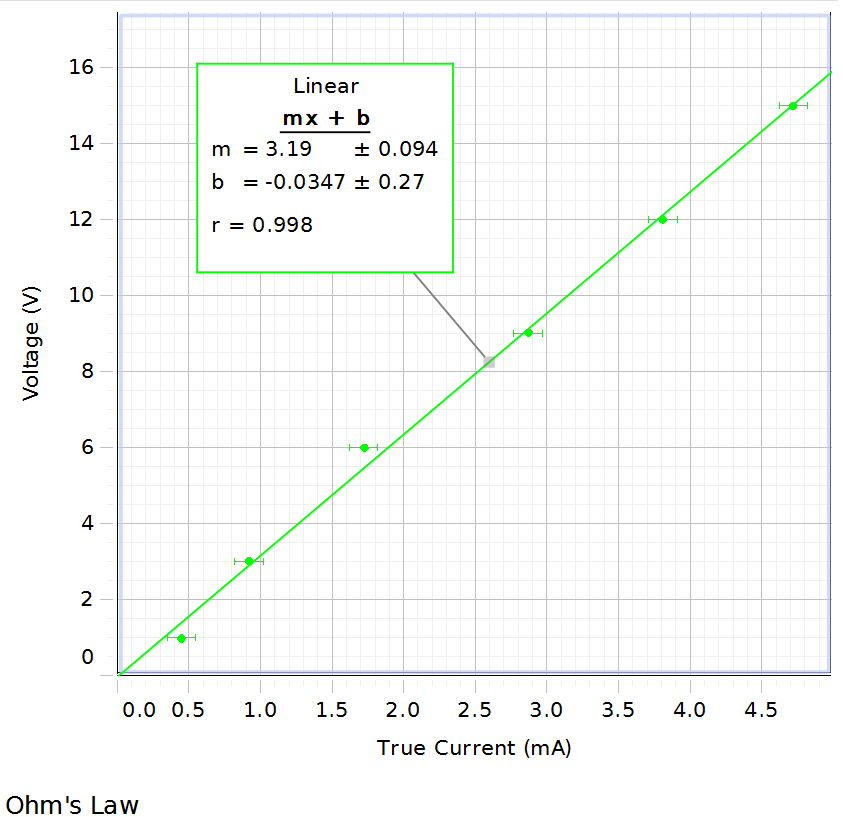

Now, we try to use example to plot the data point and fitting the data point with linear function.

# 1)Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2)Import dataset

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Current (A),Voltage (V)
0,0.21,2
1,0.28,4
2,0.57,6
3,0.84,8
4,0.99,10


# 3)Plot the data points

Text(0.5, 1.0, "Ohm's Law")

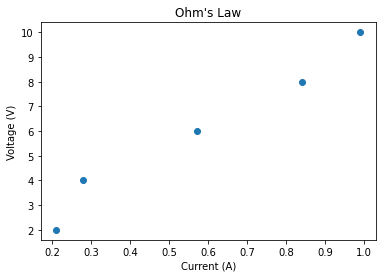

In [4]:
plt.plot(data['Current (A)'], data['Voltage (V)'], 'o')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title("Ohm's Law")

# 4) Create Function

In [5]:
# Define the linear function
#x = np.linspace(0.,1.,10)
def linear(x, m, c):
    y = m*x + c
    return y

In [6]:
parameters, covariance = curve_fit(linear, data['Current (A)'], data['Voltage (V)'])

In [7]:
fit_A = parameters[0]
fit_B = parameters[1]

print(fit_A)
print(fit_B)


9.16400104272562
0.7032073973045937


# 5)Fit the function to data points

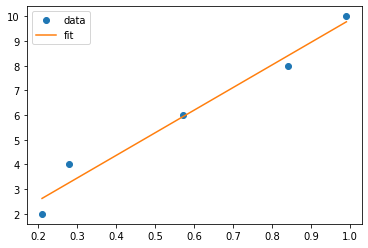

In [8]:
fit_y = linear(data['Current (A)'], fit_A, fit_B)
plt.plot(data['Current (A)'], data['Voltage (V)'], 'o', label='data')
plt.plot(data['Current (A)'], fit_y, '-', label='fit')
plt.legend()

In [9]:
SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
SE_B = SE[1]
#SE_C = SE[2]

print(F'The value of A is {fit_A:.5f} with standard error of {SE_A:.5f}.')
print(F'The value of B is {fit_B:.5f} with standard error of {SE_B:.5f}.')
#print(F'The value of C is {fit_C:.5f} with standard error of {SE_C:.5f}.')

The value of A is 9.16400 with standard error of 0.90810.
The value of B is 0.70321 with standard error of 0.59313.


m is represent resistance of the resistor which is 9.16 with standard error of 0.91.

# 6)Calculate R^2

You can get the parameters (popt) from curve_fit() with

In [10]:
popt, pcov = curve_fit(linear, data['Current (A)'], data['Voltage (V)'])

You can get the residual sum of squares (ss_res) with

In [11]:
residuals = data['Voltage (V)']- linear(data['Current (A)'], *popt)

In [12]:
ss_res = np.sum(residuals**2)

You can get the total sum of squares (ss_tot) with

In [13]:
ss_tot = np.sum((data['Voltage (V)']-np.mean(data['Voltage (V)']))**2)

And finally, the r_squared-value with,

In [14]:
r_squared = 1 - (ss_res / ss_tot)

In [15]:
print(r_squared)

0.9713841099680125


The value of R^2 is 0.97

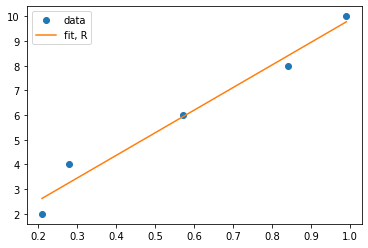

In [19]:
fit_y = linear(data['Current (A)'], fit_A, fit_B)
plt.plot(data['Current (A)'], data['Voltage (V)'], 'o', label='data')
plt.plot(data['Current (A)'], fit_y, '-', label='fit, R'%r_squared)
plt.legend()